In [67]:
#PF Optimization - EMT
import numpy as np
from numpy import array
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [203]:
my_pf = {'ASIAN_PAINT','NESTLE','PIDILITE','TITAN','KMB'}
init_weight = np.array([1/5,1/5,1/5,1/5,1/5])

In [204]:
#load data
df1 = pd.read_csv('D:/NLP Course/Stock Data/Asian Paints - 3Yrs.csv')
df2 = pd.read_csv('D:/NLP Course/Stock Data/NESTLE - 3Yrs.csv')
df3 = pd.read_csv('D:/NLP Course/Stock Data/Pidilite - 3Yrs.csv')
df4 = pd.read_csv('D:/NLP Course/Stock Data/Titan - 3Yrs.csv')
df5 = pd.read_csv('D:/NLP Course/Stock Data/KM Bank - 3 Yrs.csv')

In [205]:
#inverse the data - start from past to present
df1 = df1.iloc[::-1]
df2 = df2.iloc[::-1]
df3 = df3.iloc[::-1]
df4 = df4.iloc[::-1]
df5 = df5.iloc[::-1]

In [206]:
#Convert it to datetime from object
df1['Date']= pd.to_datetime(df1.Date)
df2['Date']= pd.to_datetime(df2.Date)
df3['Date']= pd.to_datetime(df3.Date)
df4['Date']= pd.to_datetime(df4.Date)
df5['Date']= pd.to_datetime(df5.Date)

C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


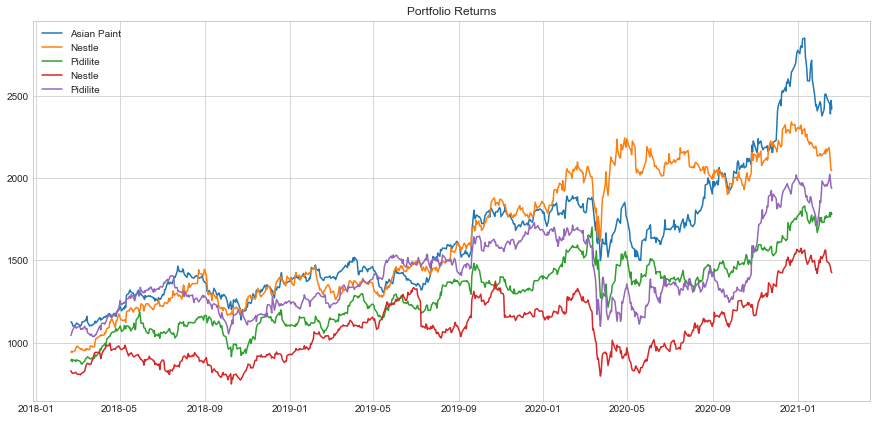

In [207]:
# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.title('Portfolio Returns')
plt.plot(df1['Date'],df1['Close Price'],label = 'Asian Paint' )
plt.plot(df2['Date'],df2['Close Price']/8,label = 'Nestle')     #normalized by 1/8 to fit in the graph
plt.plot(df3['Date'],df3['Close Price'],label = 'Pidilite')
plt.plot(df4['Date'],df4['Close Price'],label = 'Nestle')
plt.plot(df5['Date'],df5['Close Price'],label = 'Pidilite')
plt.legend(loc='upper left')
plt.show()

In [208]:
df = pd.DataFrame(columns=['Asian Paints', 'Nestle', 'Pidilite','Titan','KMB'])

df['Asian Paints'] = df1['Close Price']
df['Nestle']       = df2['Close Price']
df['Pidilite']     = df3['Close Price']
df['Titan']        = df4['Close Price']
df['KMB']          = df5['Close Price']

print(df)

     Asian Paints    Nestle  Pidilite    Titan      KMB
743       1126.70   7554.85    893.60   831.20  1045.00
742       1125.55   7593.45    899.85   822.90  1054.75
741       1116.35   7540.45    885.75   816.35  1072.65
740       1101.90   7582.50    897.15   814.15  1079.85
739       1106.25   7615.50    891.75   819.90  1105.55
..            ...       ...       ...      ...      ...
4         2457.70  17484.50   1764.75  1483.90  1986.20
3         2450.00  17222.45   1789.40  1472.35  2021.65
2         2389.20  16739.90   1765.05  1460.90  1989.15
1         2470.20  16374.15   1792.30  1434.40  1945.30
0         2418.90  16386.10   1781.55  1425.50  1937.30

[744 rows x 5 columns]


In [209]:
pf_returns = df.pct_change()
pf_returns

,Asian Paints,Nestle,Pidilite,Titan,KMB
743,NaN,NaN,NaN,NaN,NaN
742,-0.001021,0.005109,0.006994,-0.009986,0.009330
741,-0.008174,-0.006980,-0.015669,-0.007960,0.016971
740,-0.012944,0.005577,0.012870,-0.002695,0.006712
739,0.003948,0.004352,-0.006019,0.007063,0.023800
...,...,...,...,...,...
4,-0.011384,0.011477,0.002016,-0.006993,0.017807
3,-0.003133,-0.014988,0.013968,-0.007784,0.017848
2,-0.024816,-0.028019,-0.013608,-0.007777,-0.016076
1,0.033903,-0.021849,0.015439,-0.018140,-0.022045


In [210]:
annual_cov_matrix = pf_returns.cov()*252
annual_cov_matrix

,Asian Paints,Nestle,Pidilite,Titan,KMB
Asian Paints,0.079441,0.037115,0.050517,0.039626,0.041697
Nestle,0.037115,0.073432,0.033223,0.033286,0.027980
Pidilite,0.050517,0.033223,0.081369,0.038087,0.033254
Titan,0.039626,0.033286,0.038087,0.110310,0.044423
KMB,0.041697,0.027980,0.033254,0.044423,0.110505


In [211]:
pf_variance = np.dot(init_weight.T,np.dot(annual_cov_matrix,init_weight))
pf_std_dev = np.sqrt(pf_variance)
pf_annual_ret = np.sum(pf_returns.mean()*init_weight)*252

In [212]:
percent_variance = str(round(pf_variance,2)*100) + '%' 
percent_StdDev = str(round(pf_std_dev,1)*100) + '%' 
percent_return = str(round(pf_annual_ret,1)*100) + '%' 

print('Expected Annual PF returns: '+ percent_return)
print('Expected Annual PF volatility: '+ percent_StdDev)
print('Expected Annual PF variance: '+ percent_variance)

Expected Annual PF returns: 30.0%
Expected Annual PF volatility: 20.0%
Expected Annual PF variance: 5.0%


In [213]:
# Simulating 10000 portfolios
num_port = 10000

# Creating an empty array to store portfolio weights - 3x5k
all_wts = np.zeros((num_port, len(df.columns)))       

# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [214]:
for i in range(num_port):
        wts = np.random.uniform(size = len(df.columns))
        wts = wts/np.sum(wts)
  
        # saving weights in the array
        all_wts[i,:] = wts
  
        # Portfolio Returns
        port_ret = np.sum(pf_returns.mean() * wts)
        port_ret = port_ret*252
  
        # Saving Portfolio returns
        port_returns[i] = port_ret
    
        # Portfolio Risk
        port_sd = np.sqrt(np.dot(wts.T, np.dot(annual_cov_matrix, wts)))
        port_risk[i] = port_sd
                
        # Portfolio Sharpe Ratio - assuming 0% Risk Free Rate
        sr = port_ret / port_sd
        sharpe_ratio[i] = sr

In [215]:
names   = df.columns
min_risk = all_wts[port_risk.argmin()]
print(min_risk)
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.11344894 0.35103382 0.23037617 0.12248746 0.18265361]
[0.19734678 0.43085055 0.17875442 0.04226236 0.15078588]


In [216]:
print(sharpe_ratio.max())
print(port_risk.min())
print(port_returns.min())
print(port_returns.max())

1.3107541621880634
0.21660387626973437
0.24761719419616054
0.2971398812874305


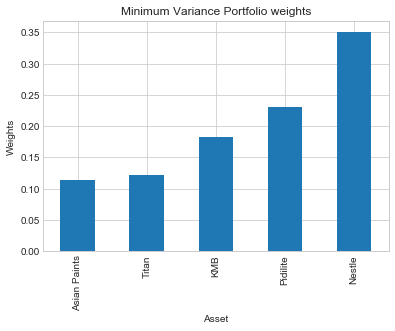

Asian Paints    0.113449
Titan           0.122487
KMB             0.182654
Pidilite        0.230376
Nestle          0.351034
dtype: float64


In [217]:
min_risk = pd.Series(min_risk, index=names)
min_risk = min_risk.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_risk.plot(kind = 'bar')
plt.show();
print(min_risk)

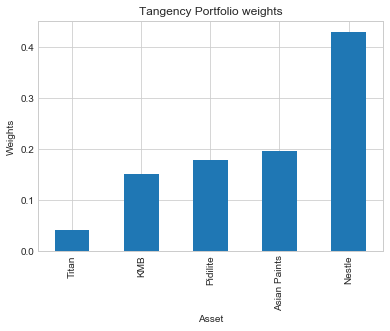

Titan           0.042262
KMB             0.150786
Pidilite        0.178754
Asian Paints    0.197347
Nestle          0.430851
dtype: float64


In [218]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();
print(max_sr)

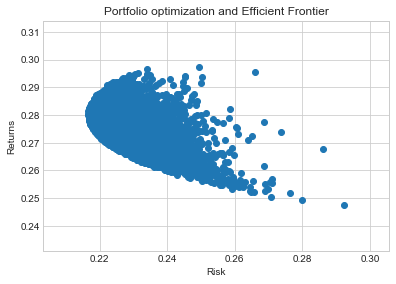

In [220]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
#plt.scatter(min_risk[0],max_sr[0],marker=(5,1,0),color='r',s=100)
plt.show();